# Adventure Works Cycles Business Analysis

> The AdventureWorks Database supports a fictitious, multinational manufacturing company called Adventure Works Cycles

## 1.0 - Libraries and Functions

### 1.1 - Libraries

In [1]:
# data extraction and manipulation
from zipfile import ZipFile
import pandas as pd

# data visualization
import seaborn as sns
import matplotlib.pyplot as plt

### 1.2 - Helper Functions

In [161]:
def jupyter_settings():
    
    # Only to use on jupyter notebook
    from IPython.core.display import display, HTML
    
    # show the charts at jupyter cell
    %matplotlib inline
    %pylab inline
    
    # Matplotlib style and size patterns
    plt.style.use('bmh')
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 20
    
    # Dataframe control showded
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.options.display.float_format = '{:20,.2f}'.format
    pd.set_option('display.expand_frame_repr', False)
    
    # Vizualization expanded to 95% of screen
    display(HTML('<style>.conteiner{width:95% !important;}</style>'))

    # Apply into seaborn
    sns.set()

    
# Function Called
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


## 2.0 - Data Extraction

In [4]:
# Downloading zip code into a specific directory (if exists: no save)
!wget -P ../datasets -nc https://hermes.digitalinnovation.one/lab_projects/files/2be7520c-94cd-463f-8432-d580d0810344.zip

File ‘../datasets/2be7520c-94cd-463f-8432-d580d0810344.zip’ already there; not retrieving.



In [381]:
# Loading dataset inside the zip file
zf = ZipFile('../datasets/2be7520c-94cd-463f-8432-d580d0810344.zip')
data_raw = pd.read_excel(zf.open([ad for ad in zf.namelist() if 'Adventure' in ad ][0]))

## 3.0 - Data Cleaning

### 3.1 - Dimensionality

In [163]:
# showing the numbers of columns, lines and dimensionality
print(f'Numbers of Line Registers: {data_raw.shape[0]}\nNumbers of Columns: {data_raw.shape[1]}')
print(f'Dimentionality: {data_raw.shape[0] * data_raw.shape[1]}')

Numbers of Line Registers: 904
Numbers of Columns: 16
Dimentionality: 14464


There are not problem with dimentionality, because, it's small database, only one pc run

### 3.2 - Rename Columns

In [382]:
# convertinf all columns to lower case and snake case (_)
data_raw.columns = data_raw.rename(str.casefold, axis='columns').columns.str.replace(' ', '_')

You can use the inflection.underscore() to convert automatically, see bellow 
<a href="https://pypi.org/project/inflection/">Pypi rename columns</a>

### 3.3 - Null and Data Type

In [165]:
# Showing Data types, numbers of null or NaN and first three registers
null_dtypes = pd.concat([pd.concat([data_raw.dtypes, data_raw.isna().sum()], axis=1), data_raw.head(3).T], axis=1).reset_index()
null_dtypes.columns = ['columns_name', 'data_types', 'number_of_null', 'register_01','register_02','register_03']
null_dtypes

,columns_name,data_types,number_of_null,register_01,register_02,register_03
0,data_venda,datetime64[ns],0,2008-05-09 00:00:00,2008-05-12 00:00:00,2008-05-14 00:00:00
1,data_envio,datetime64[ns],0,2008-05-29 00:00:00,2008-05-17 00:00:00,2008-05-20 00:00:00
2,id_loja,int64,0,199,306,306
3,id_produto,int64,0,384,384,384
4,id_cliente,int64,0,18839,19051,19052
5,no._venda,object,0,200805093CS607,200805123CS567,200805143CS576
6,custo_unitário,float64,0,348.58,348.58,348.58
7,preço_unitário,float64,0,758.00,758.00,758.00
8,quantidade,int64,0,6,6,6
9,valor_desconto,float64,0,0.00,0.00,0.00


All variables are correctly datatype and no nullable

You can you use schema to validate all data before cleaning or after cleaning see more here <a href="https://pandera.readthedocs.io/en/stable/">pandera data validation</a>

### 3.4 - Descriptive Analysis

In [166]:
# Descriptive analysis of central tendency
data_raw.describe(datetime_is_numeric=True).T

,count,mean,min,25%,50%,75%,max,std
data_venda,904,2009-01-01 23:42:28.672566528,2008-01-02 00:00:00,2008-07-04 18:00:00,2008-12-24 00:00:00,2009-06-22 06:00:00,2009-12-31 00:00:00,NaN
data_envio,904,2009-01-10 12:44:36.106194688,2008-01-12 00:00:00,2008-07-11 18:00:00,2008-12-29 12:00:00,2009-07-03 06:00:00,2010-01-12 00:00:00,NaN
id_loja,904.00,270.02,199.00,199.00,306.00,307.00,307.00,50.96
id_produto,904.00,"1,225.24",366.00,384.00,"1,202.00","1,226.00","2,497.00",706.70
id_cliente,904.00,"19,029.09","18,815.00","18,964.75","19,060.00","19,107.00","19,145.00",96.43
custo_unitário,904.00,272.01,5.09,324.69,330.66,348.58,348.58,129.77
preço_unitário,904.00,742.53,9.99,758.00,980.00,998.00,999.00,368.59
quantidade,904.00,62.95,2.00,6.00,9.00,17.00,"1,560.00",148.95
valor_desconto,904.00,689.12,0.00,0.00,461.17,"1,005.08","6,272.00",822.36
valor_venda,904.00,"6,620.14",159.84,"3,920.00","5,798.70","7,986.00","29,400.00","4,319.41"


First of all, the data look good, no exception and dirty

### 3.5 - Data Inconsistency

1. there are data out of range ?
    - No
2. there are cost righer than sale price?
    - No
3. there are empty field?
    - No
4. there are color, class, brand, manufacture and product ouline name ('possible input error')?

In [203]:
# 1.0 There are data out of range -> NO

dates = pd.concat([data_raw.select_dtypes(include='datetime').min(), 
                   data_raw.select_dtypes(include='datetime').max()], axis=1).reset_index()
dates.columns = ['columns_name', 'lower_date', 'upper_date']
dates

,columns_name,lower_date,upper_date
0,data_venda,2008-01-02,2009-12-31
1,data_envio,2008-01-12,2010-01-12


Lower date: data_venda   2008-01-02
data_envio   2008-01-12
dtype: datetime64[ns]


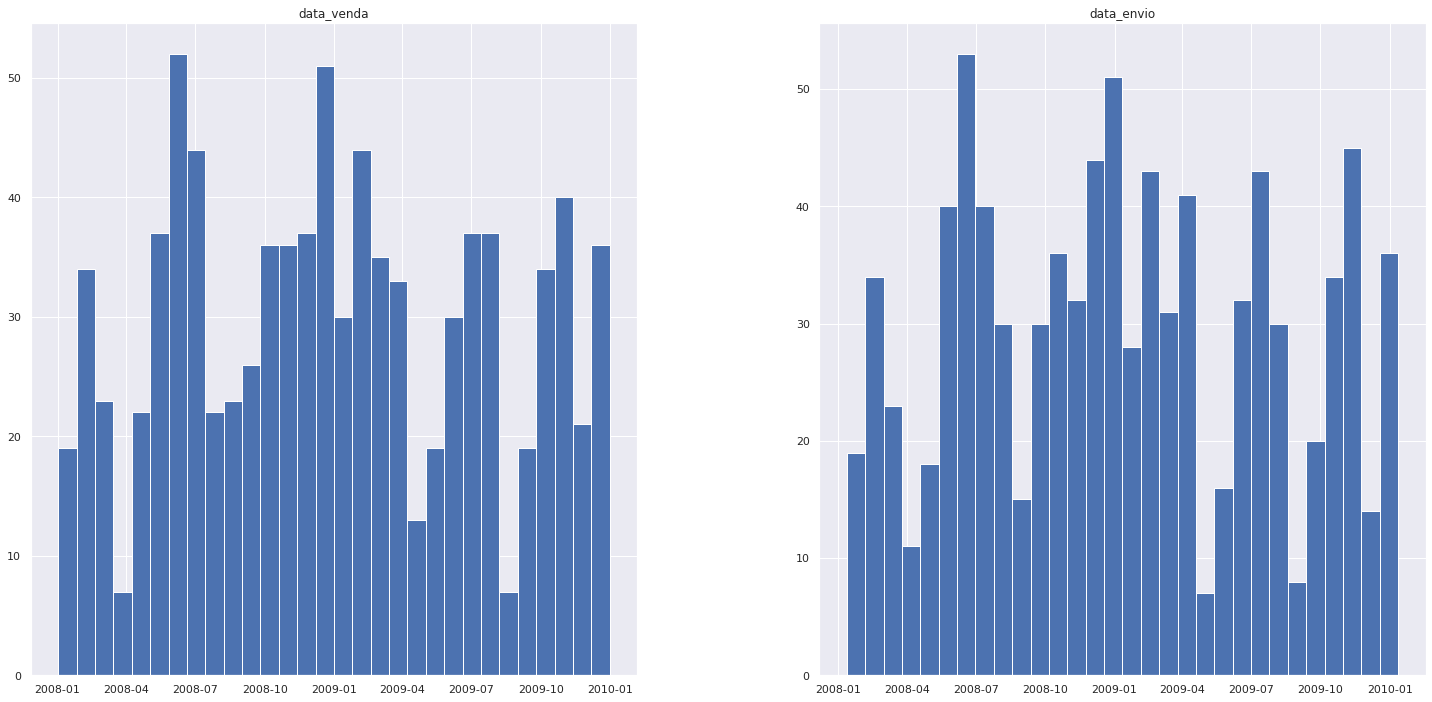

In [196]:
data_raw.select_dtypes(include='datetime').hist(bins=30);

In [383]:
# 2. There are cost righer than sale price?
print('Number of register with cost upper than price sale: ', data_raw.query('custo_unitário >= preço_unitário').shape[0])
data_raw.query('custo_unitário >= preço_unitário').head()

Number of register with cost upper than price sale:  0


,data_venda,data_envio,id_loja,id_produto,id_cliente,no._venda,custo_unitário,preço_unitário,quantidade,valor_desconto,valor_venda,produto,fabricante,marca,classe,cor


In [390]:
# 3. there are empty field?
lista = list()
for name in data_raw.columns:
    lista.append([data_raw[name][data_raw[name].isin(['', ' '])].index.to_list(), name])
pd.DataFrame(lista, columns=['index', 'columns_name']).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
index,[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]
columns_name,data_venda,data_envio,id_loja,id_produto,id_cliente,no._venda,custo_unitário,preço_unitário,quantidade,valor_desconto,valor_venda,produto,fabricante,marca,classe,cor


In [397]:
# 4. there are color, class, brand, manufacture and product outline name ('possible input error')?
(data_raw['cor'].value_counts(),
data_raw['classe'].value_counts(),
data_raw['fabricante'].value_counts(),
data_raw['produto'].value_counts())

(Black     315
 Grey      212
 White     175
 Red       115
 Silver     87
 Name: cor, dtype: int64,
 Regular    732
 Economy    172
 Name: classe, dtype: int64,
 Fabrikam, Inc.     494
 Adventure Works    238
 Contoso, Ltd       172
 Name: fabricante, dtype: int64,
 Adventure Works Laptop15.4W M1548 Black            123
 Fabrikam Trendsetter 2/3'' 17mm X100 Grey          118
 Adventure Works Laptop15.4W M1548 Red              115
 Fabrikam Trendsetter 2/3'' 17mm X100 Black         103
 Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey          94
 Fabrikam Trendsetter 1/3'' 8.5mm X200 White         90
 Fabrikam Trendsetter 1/3'' 8.5mm X200 Black         89
 Headphone Adapter for Contoso Phone E130 Silver     87
 Headphone Adapter for Contoso Phone E130 White      85
 Name: produto, dtype: int64)

Data register are all right

### 3.6 - Feature Engineering

In [ ]:
data_raw['margem_lucro'] = data_raw['preço_unitário'] - data_raw['custo_unitário']


### 3.7 - Data Load

In [399]:
dataframe = data_raw.copy()

## 4.0 - Exploratory Data Analysis

### 4.1 - Business Questions

#### 4.1.1 - What are the best three profit products.

In [420]:
dataframe.groupby(['produto'])['margem_lucro'].mean().sort_values(ascending=False).reset_index().head(3)

,produto,margem_lucro
0,Fabrikam Trendsetter 1/3'' 8.5mm X200 Black,668.01
1,Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey,667.34
2,Fabrikam Trendsetter 1/3'' 8.5mm X200 White,667.34


In [421]:
dataframe.groupby(['produto'])['margem_lucro'].mean().sort_values().reset_index().head(3)

,produto,margem_lucro
0,Headphone Adapter for Contoso Phone E130 Silver,4.90
1,Headphone Adapter for Contoso Phone E130 White,4.90
2,Adventure Works Laptop15.4W M1548 Black,409.42


#### 4.1.2 - What are the worst three profit products.

#### 4.1.3 - What are the best three store sale.

#### 4.1.4 - What relantionshipp between profit and others variables.

#### 4.1.5 - What product is more sole.

#### 4.1.6 - What is the average ticket price.

#### 4.1.7 - What client take more profit.

### 4.2 - General Exploratory Data

### 4.3 - Questions Answered

## 5.0 - Develivery